In [1]:
import json
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl

# mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams["axes.labelsize"] = 24
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['axes.titlesize'] = 24
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [22]:
COLORS = ["tab:blue", "orangered", "tab:green", "tab:purple", "tab:red", "lightseagreen"]

def create_axes(axes, exp_name, color, dataset, metrics, seeds, batches=None):
    # derive steps from config.
    log_dir = f"../logs/{dataset}"
    with open(os.path.join(log_dir, f'{exp_name}/{seeds[0]}/config.json'), "r") as f:
        config = json.load(f)
    eval_interval, max_iters = config['training']['eval_interval'], config['training']['max_iters']
    steps = np.arange(eval_interval, max_iters + 1, eval_interval)

    # get performances for different seeds
    all_train = {metric: np.zeros(len(steps)) for metric in metrics}
    all_validation = {metric: np.zeros(len(steps)) for metric in metrics}
    for seed in seeds:
        train = {metric: [] for metric in metrics}
        validation = {metric: [] for metric in metrics}
        for step in steps:
            with open(os.path.join(log_dir, f'{exp_name}/{seed}/step_{step}.json'), "r") as f:
                res = json.load(f)
            for metric in metrics:
                train[metric].append(res[f'train_{metric}'])
                validation[metric].append(res[f'validation_{metric}'])
                # if metric == "variance":
                #     train[metric][-1] /= train[metric][0]
                #     validation[metric][-1] /= validation[metric][0]
        for i, metric in enumerate(metrics):
            all_train[metric] += np.array(train[metric]) / len(seeds)
            all_validation[metric] += np.array(validation[metric]) / len(seeds)
            if batches:
                axes[0, i].plot(steps / batches, train[metric], alpha=0.3, linewidth=1, color=color)
                axes[1, i].plot(steps / batches, validation[metric], alpha=0.3, linewidth=1, color=color)
            else:
                axes[0, i].plot(steps, train[metric], alpha=0.3, linewidth=1, color=color)
                axes[1, i].plot(steps, validation[metric], alpha=0.3, linewidth=1, color=color)

    for i, metric in enumerate(metrics):
        if batches:
            axes[0, i].plot(steps / batches, all_train[metric], linewidth=2, label=exp_name, color=color)
            axes[1, i].plot(steps / batches, all_validation[metric], linewidth=2, label=exp_name, color=color)
            axes[1, i].set_xlabel("Epochs")
        else:
            axes[0, i].plot(steps, all_train[metric], linewidth=2, label=exp_name, color=color)
            axes[1, i].plot(steps, all_validation[metric], linewidth=2, label=exp_name, color=color)
            axes[1, i].set_xlabel("Steps")

def create_fig(dataset, exp_names, metrics=["loss", "accuracy", "variance", "avg_precision", "avg_recall"], seeds=[1, 2, 3, 4, 5], batches=None):
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, len(metrics), figsize = (5 * len(metrics), 8))
    axes[0, 0].set_ylabel("Train")
    axes[1, 0].set_ylabel("Validation")

    for i, exp_name in enumerate(exp_names):
        create_axes(axes, exp_name, COLORS[i], dataset, metrics, seeds, batches=batches)

    for i, metric in enumerate(metrics):
        axes[0, i].set_title(metric)
        if metric in []:
            axes[0, i].set_yscale("log")
            axes[1, i].set_yscale("log")
    axes[1, -1].legend()
    fig.suptitle(dataset, fontsize=28)
    plt.show()

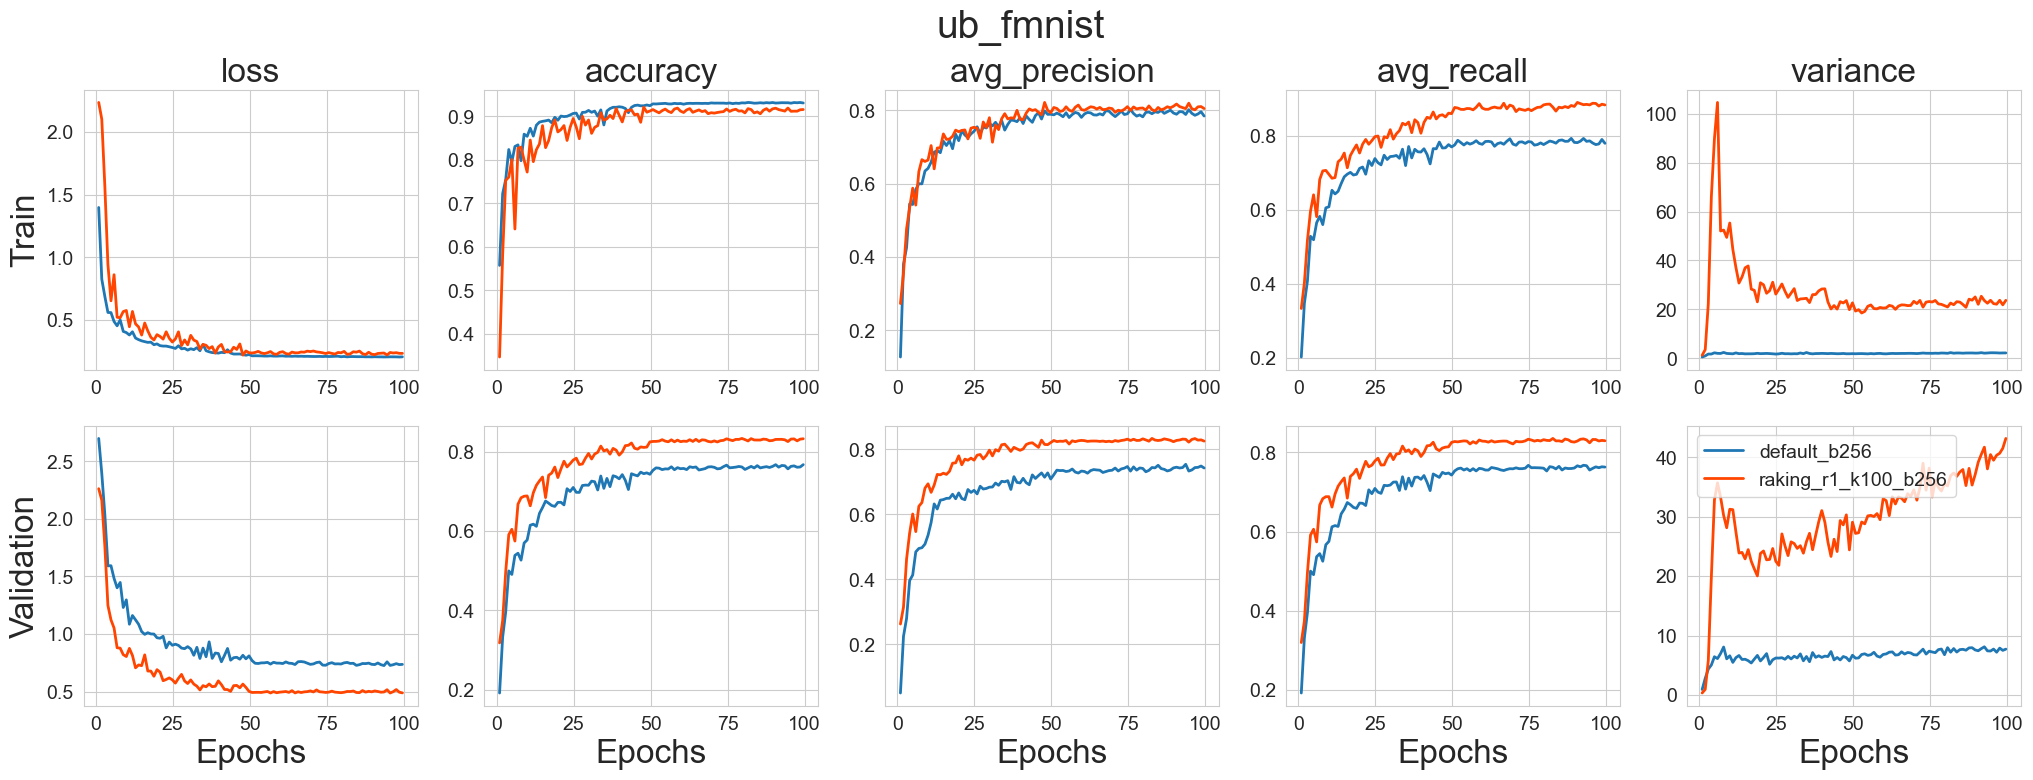

In [21]:
dataset = "ub_fmnist"
exp_names = [
    "default_b256",
    "raking_r1_k100_b256",
]

create_fig(dataset, exp_names, seeds=[0], batches=14400 / 256, metrics=["loss", "accuracy", "avg_precision", "avg_recall", "variance"])

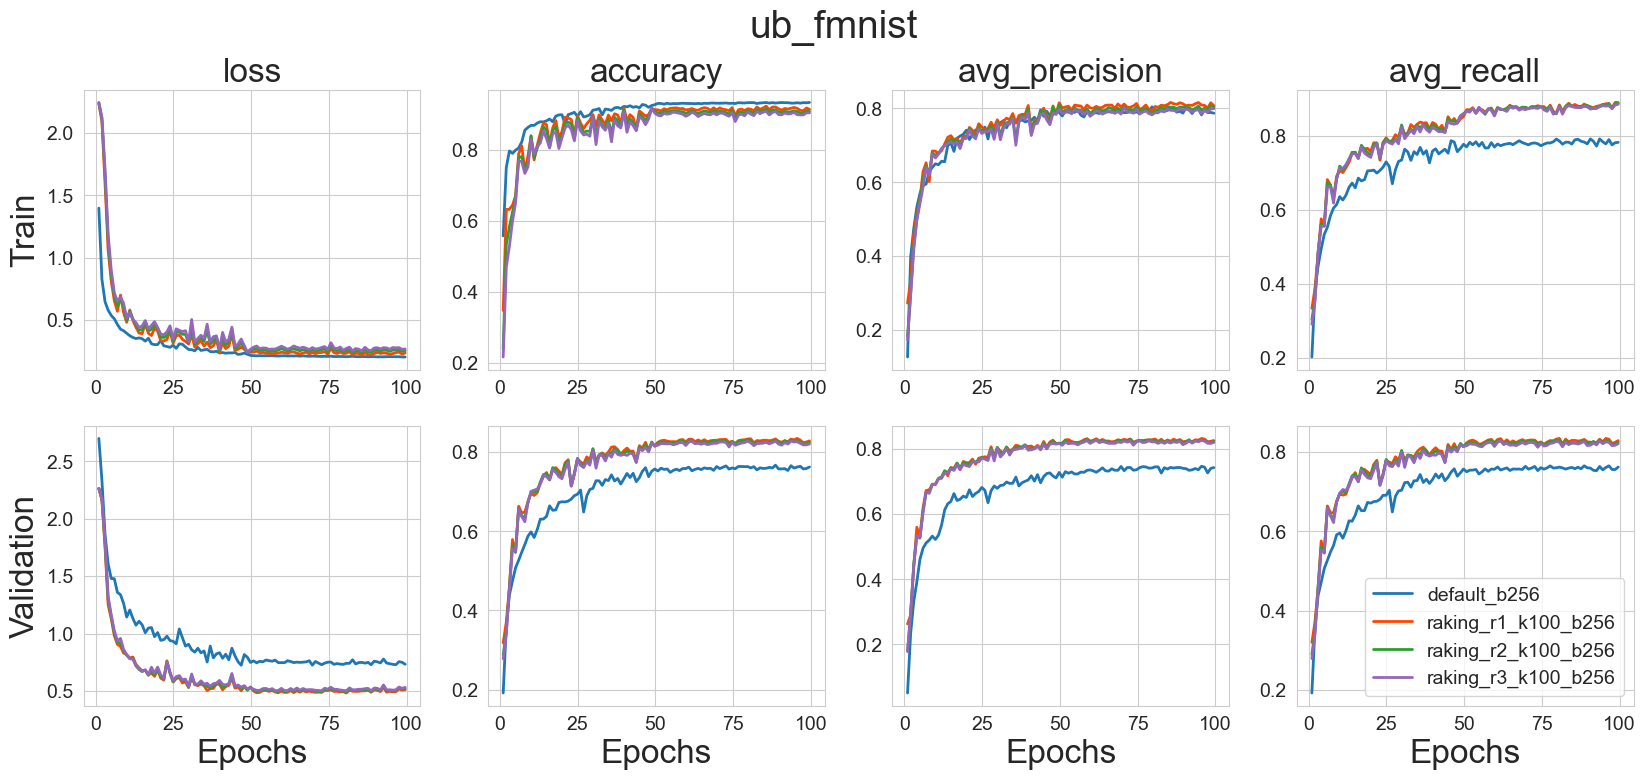

In [4]:
dataset = "ub_fmnist"
exp_names = [
    "default_b256",
    "raking_r1_k100_b256",
    "raking_r2_k100_b256",
    "raking_r3_k100_b256",
]

create_fig(dataset, exp_names, seeds=[0], batches=14400 / 256, metrics=["loss", "accuracy", "avg_precision", "avg_recall"])

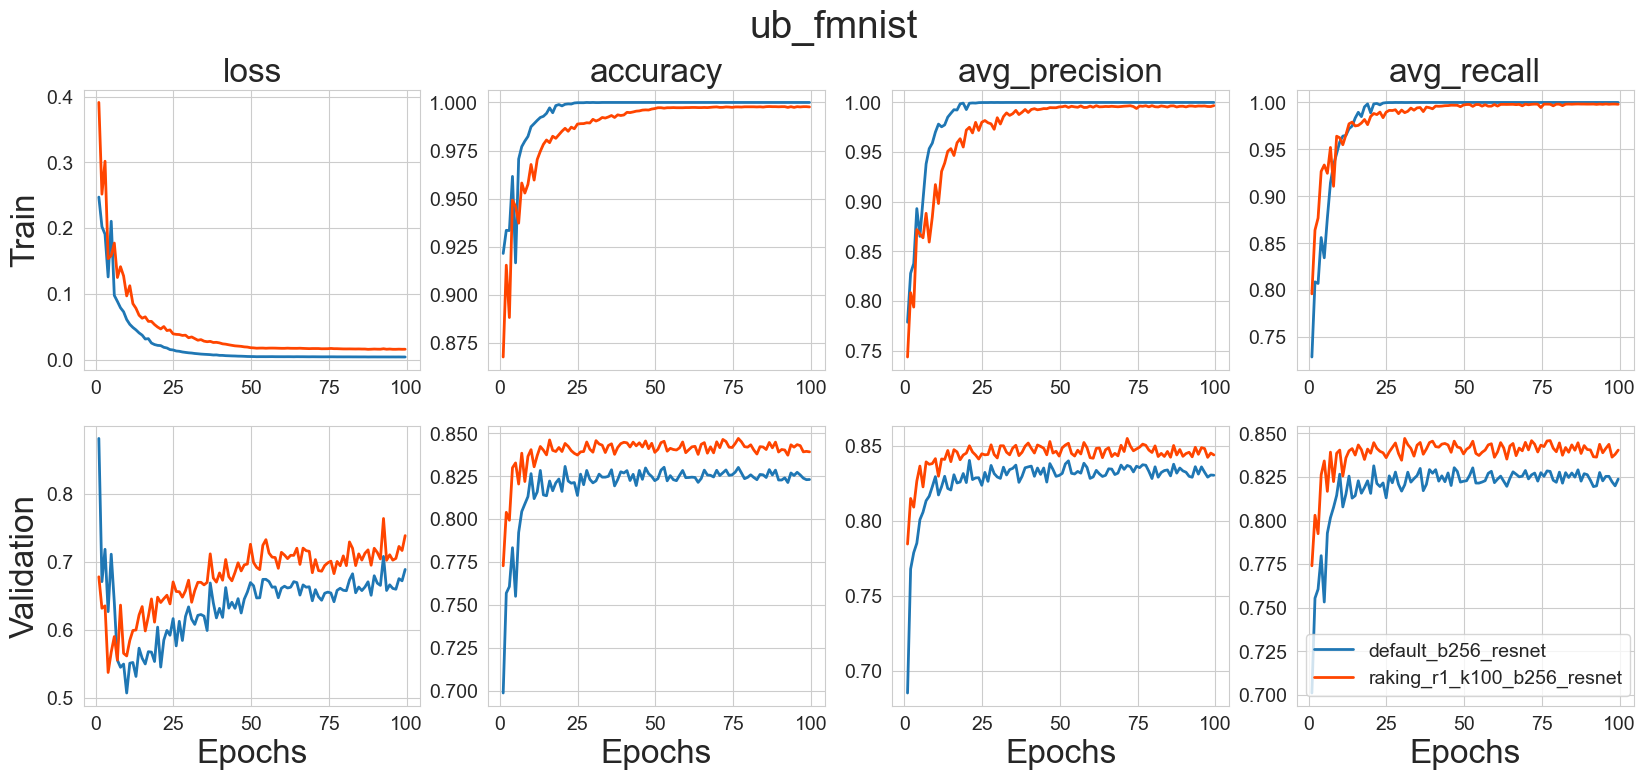

In [5]:
dataset = "ub_fmnist"
exp_names = [
    "default_b256_resnet",
    "raking_r1_k100_b256_resnet",
]

create_fig(dataset, exp_names, seeds=[0], batches=14400 / 256, metrics=["loss", "accuracy", "avg_precision", "avg_recall"])

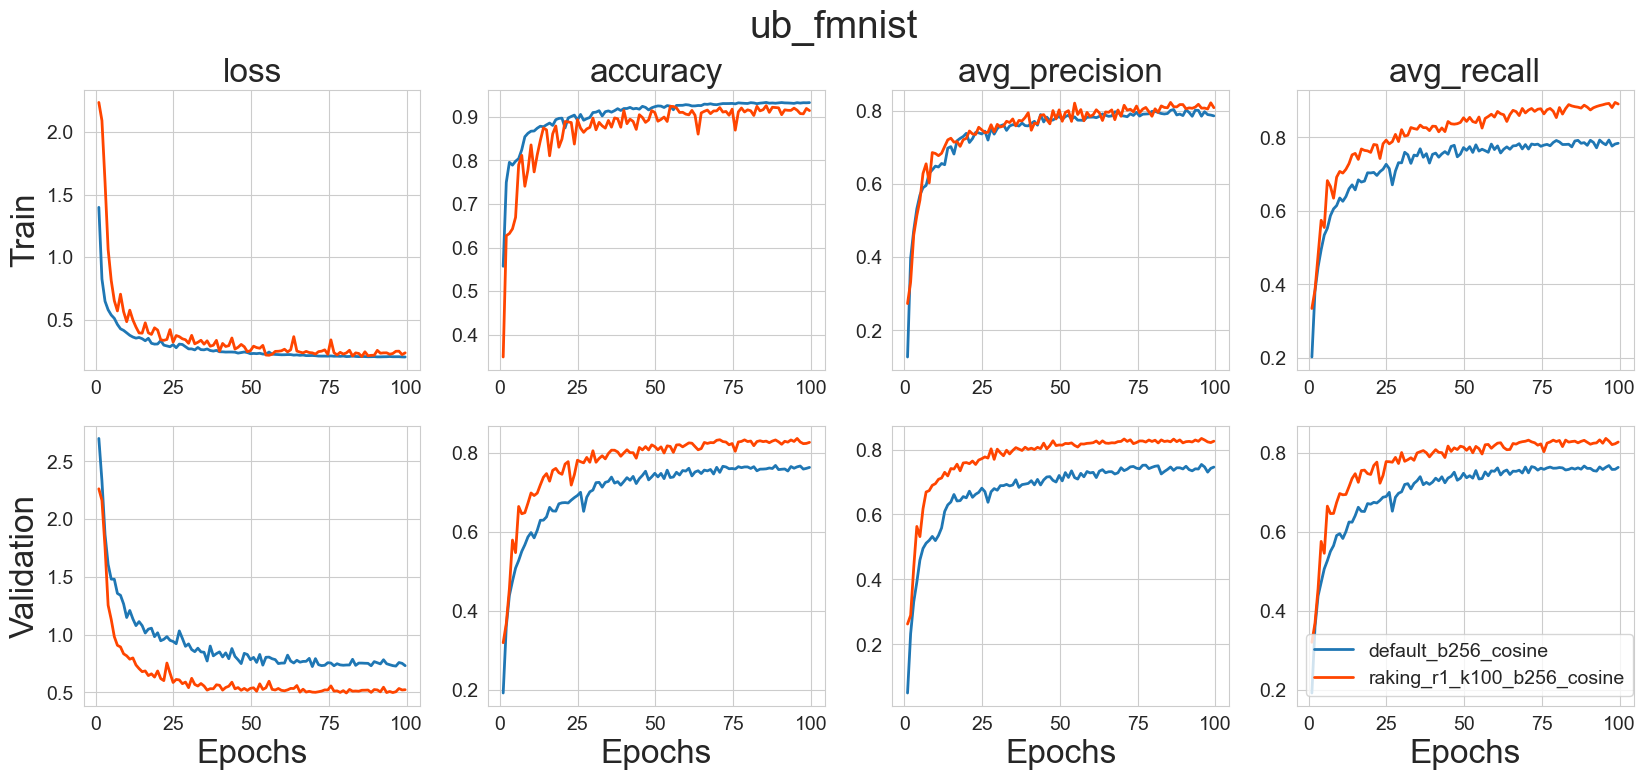

In [6]:
dataset = "ub_fmnist"
exp_names = [
    "default_b256_cosine",
    "raking_r1_k100_b256_cosine",
]

create_fig(dataset, exp_names, seeds=[0], batches=14400 / 256, metrics=["loss", "accuracy", "avg_precision", "avg_recall"])

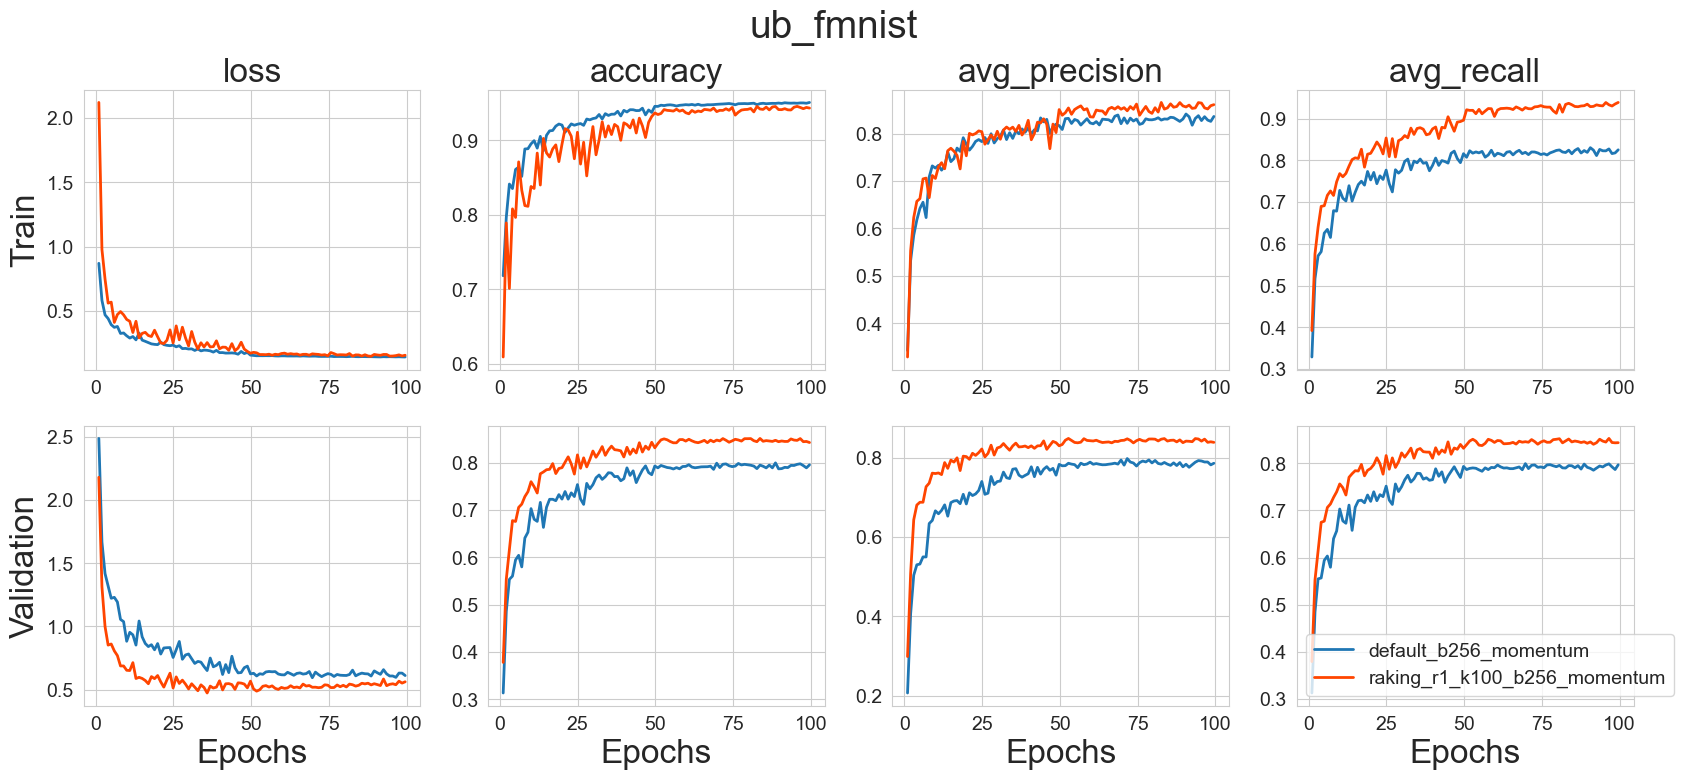

In [23]:
dataset = "ub_fmnist"
exp_names = [
    "default_b256_momentum",
    "raking_r1_k100_b256_momentum",
]

create_fig(dataset, exp_names, seeds=[0], batches=14400 / 256, metrics=["loss", "accuracy", "avg_precision", "avg_recall"])

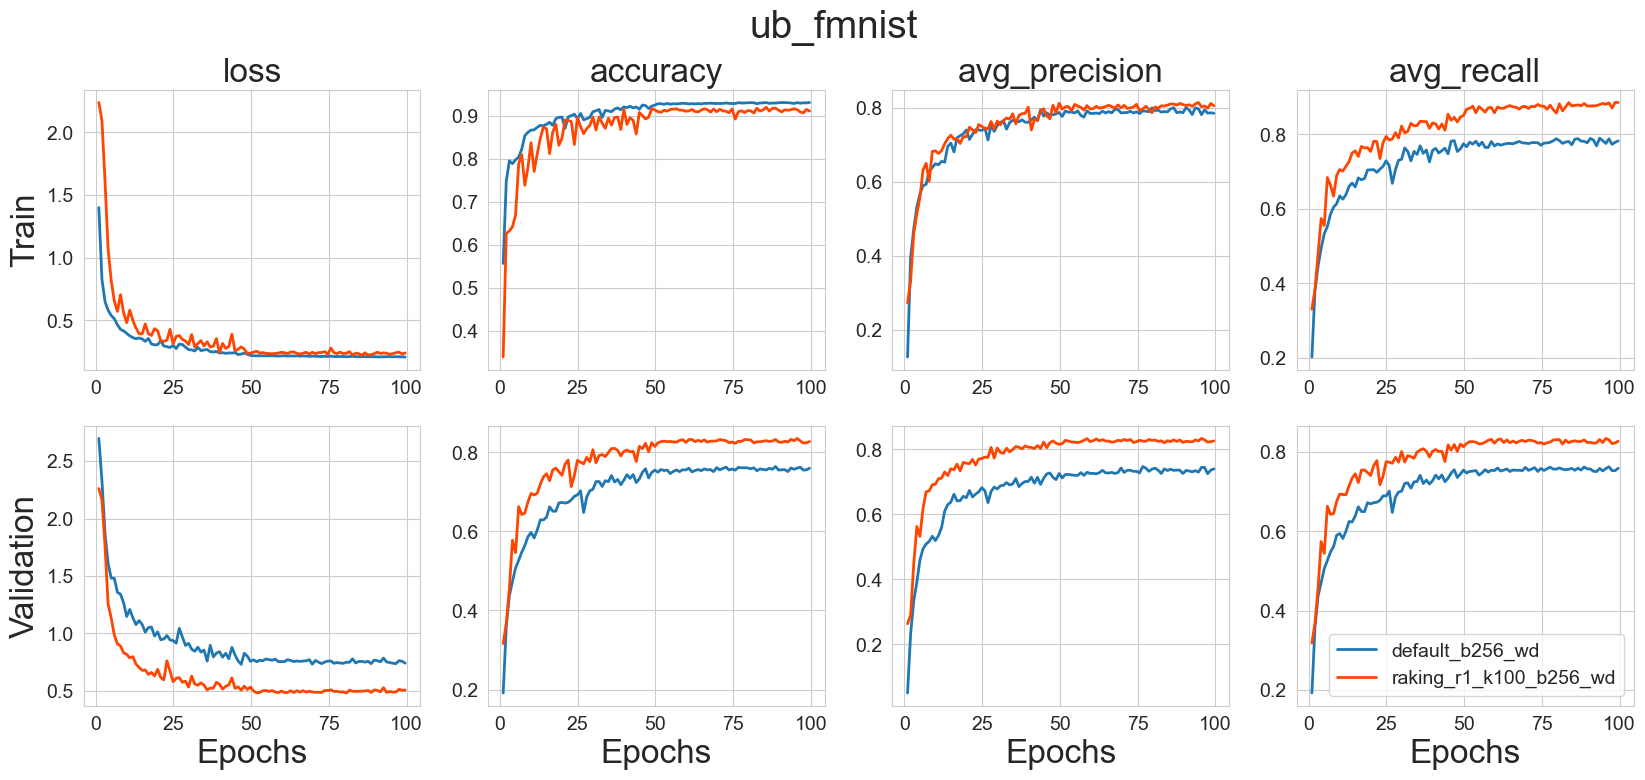

In [9]:
dataset = "ub_fmnist"
exp_names = [
    "default_b256_wd",
    "raking_r1_k100_b256_wd",
]

create_fig(dataset, exp_names, seeds=[0], batches=14400 / 256, metrics=["loss", "accuracy", "avg_precision", "avg_recall"])

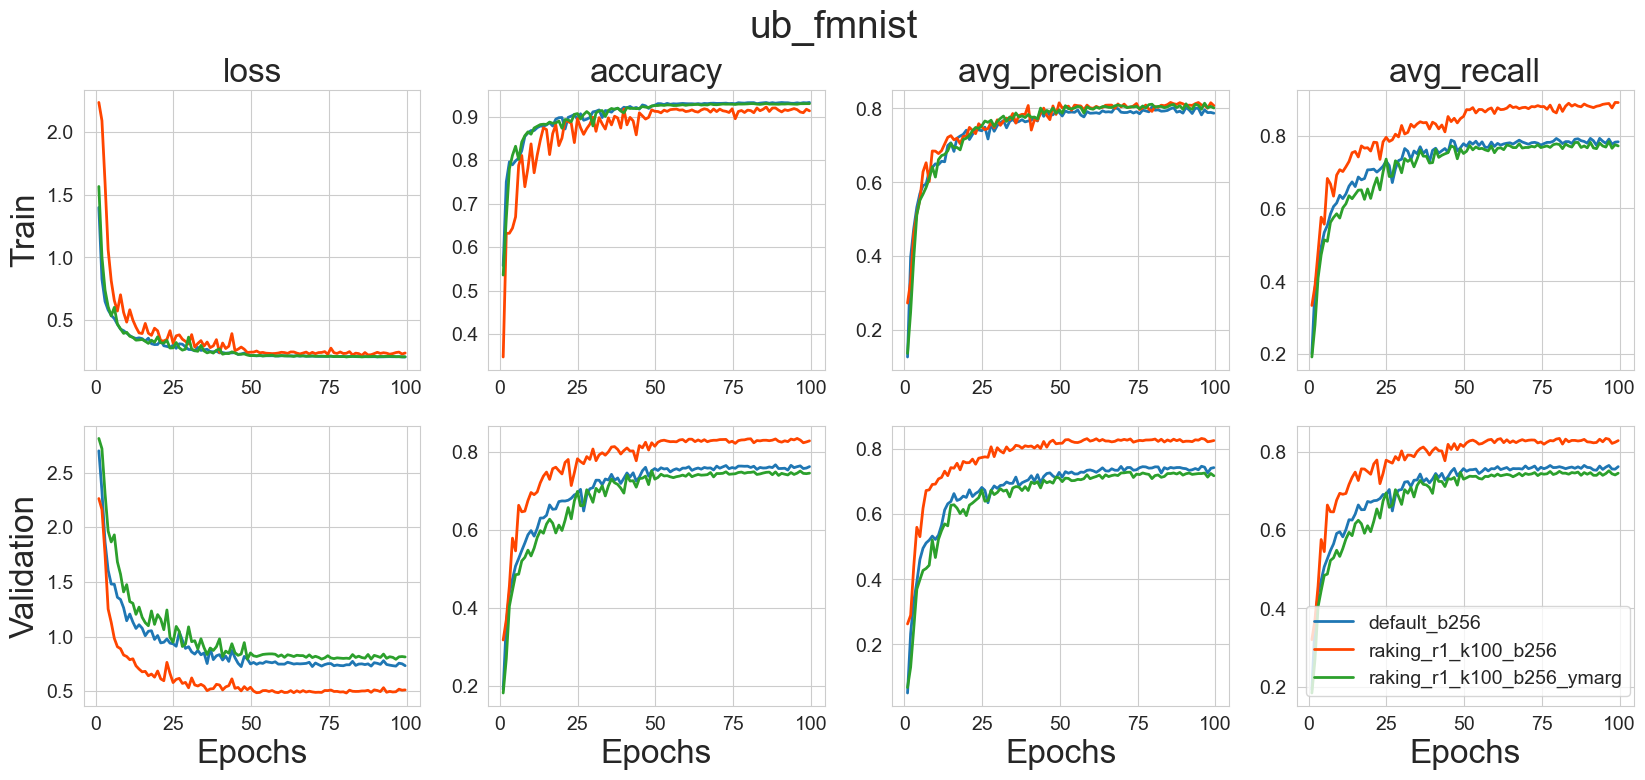

In [10]:
dataset = "ub_fmnist"
exp_names = [
    "default_b256",
    "raking_r1_k100_b256",
    "raking_r1_k100_b256_ymarg",
]

create_fig(dataset, exp_names, seeds=[0], batches=14400 / 256, metrics=["loss", "accuracy", "avg_precision", "avg_recall"])

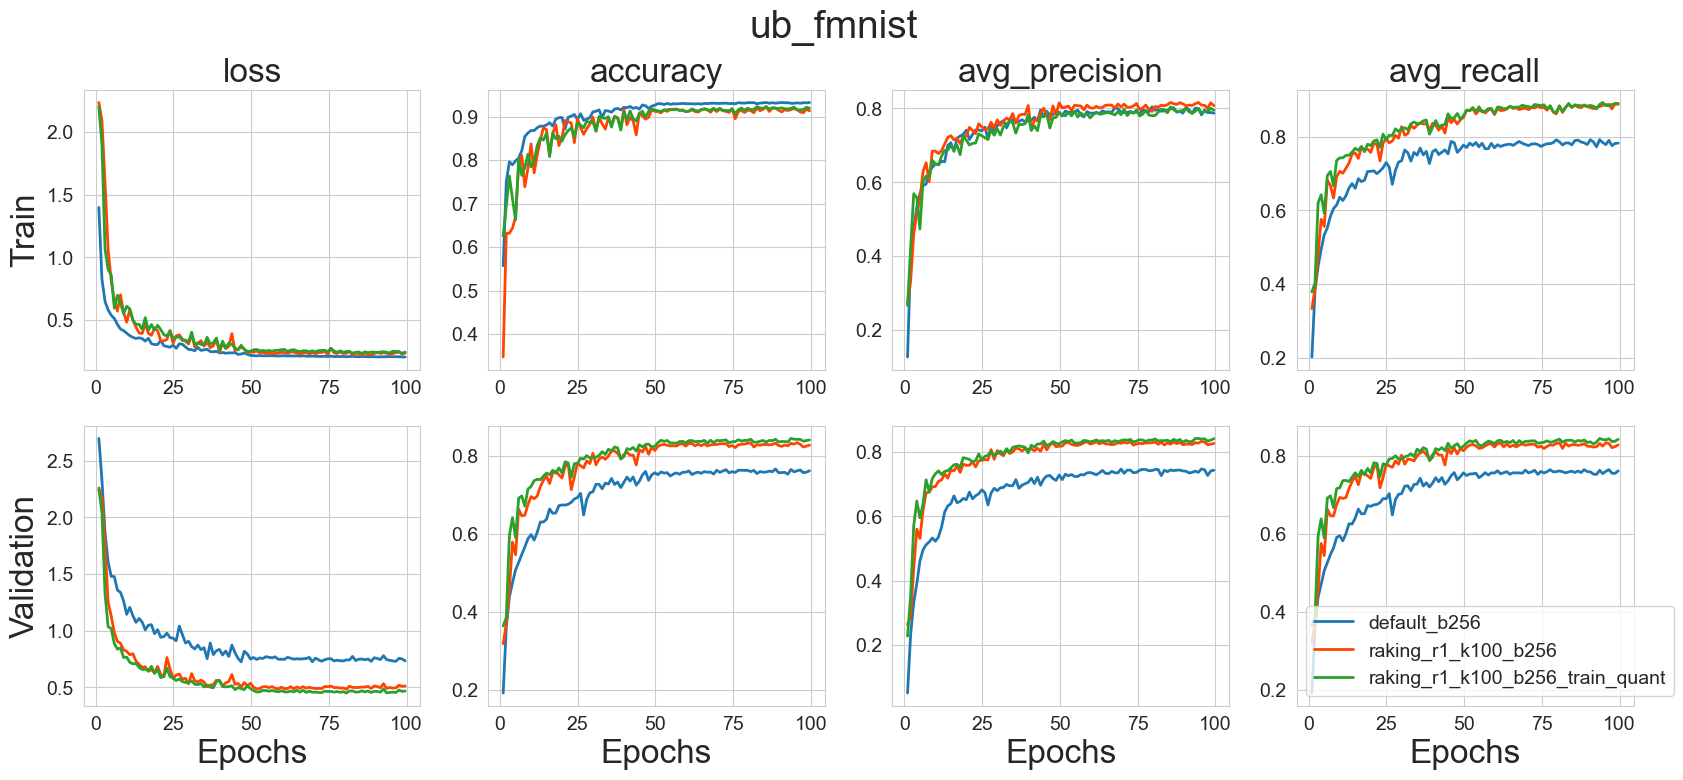

In [11]:
dataset = "ub_fmnist"
exp_names = [
    "default_b256",
    "raking_r1_k100_b256",
    "raking_r1_k100_b256_train_quant",
]

create_fig(dataset, exp_names, seeds=[0], batches=14400 / 256, metrics=["loss", "accuracy", "avg_precision", "avg_recall"])

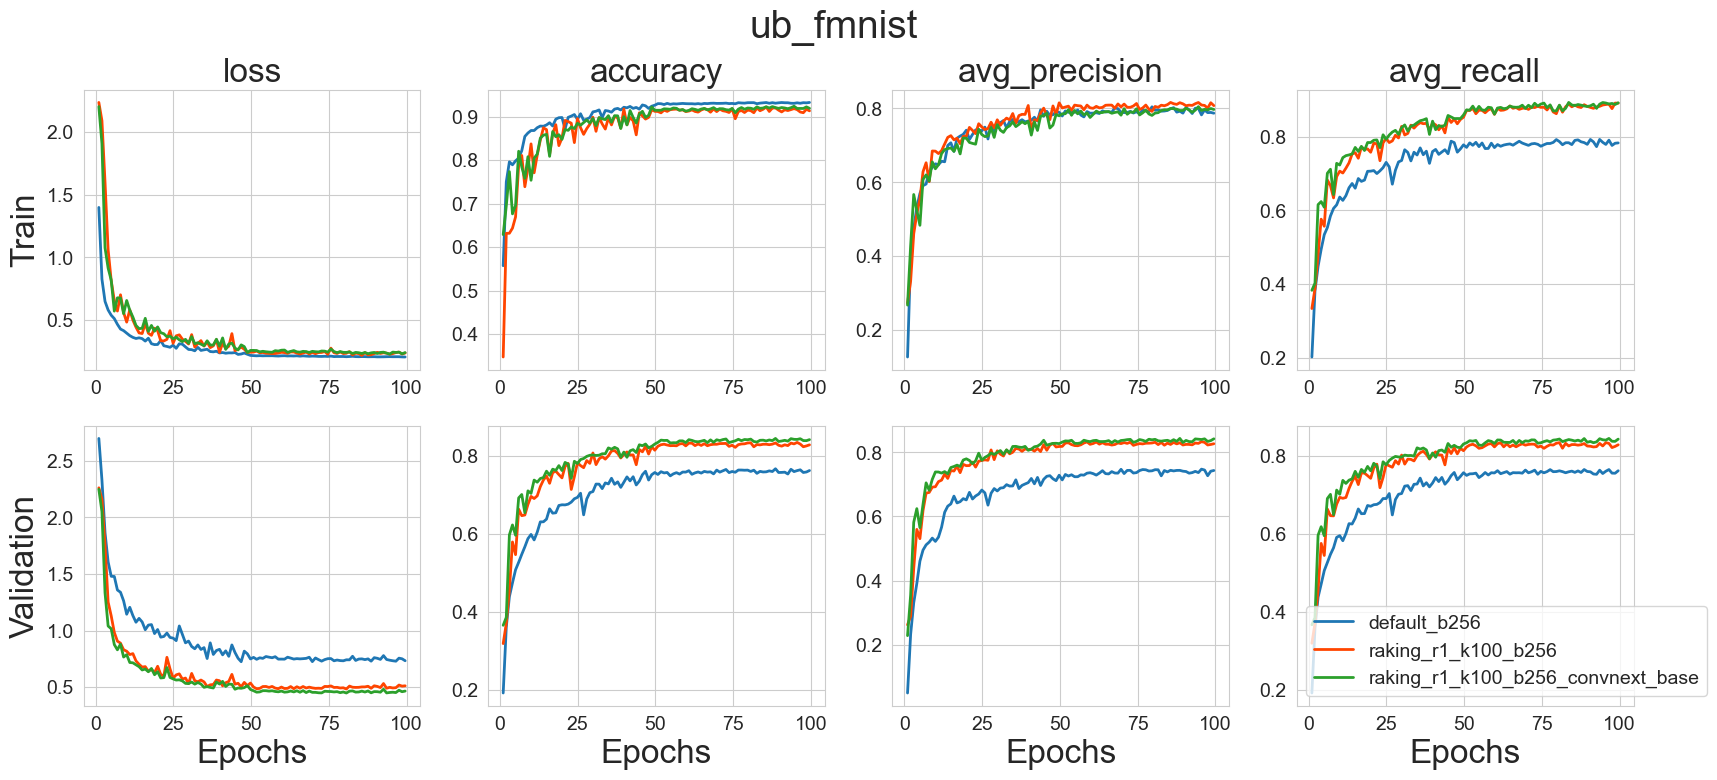

In [12]:
dataset = "ub_fmnist"
exp_names = [
    "default_b256",
    "raking_r1_k100_b256",
    "raking_r1_k100_b256_convnext_base",
]

create_fig(dataset, exp_names, seeds=[0], batches=14400 / 256, metrics=["loss", "accuracy", "avg_precision", "avg_recall"])

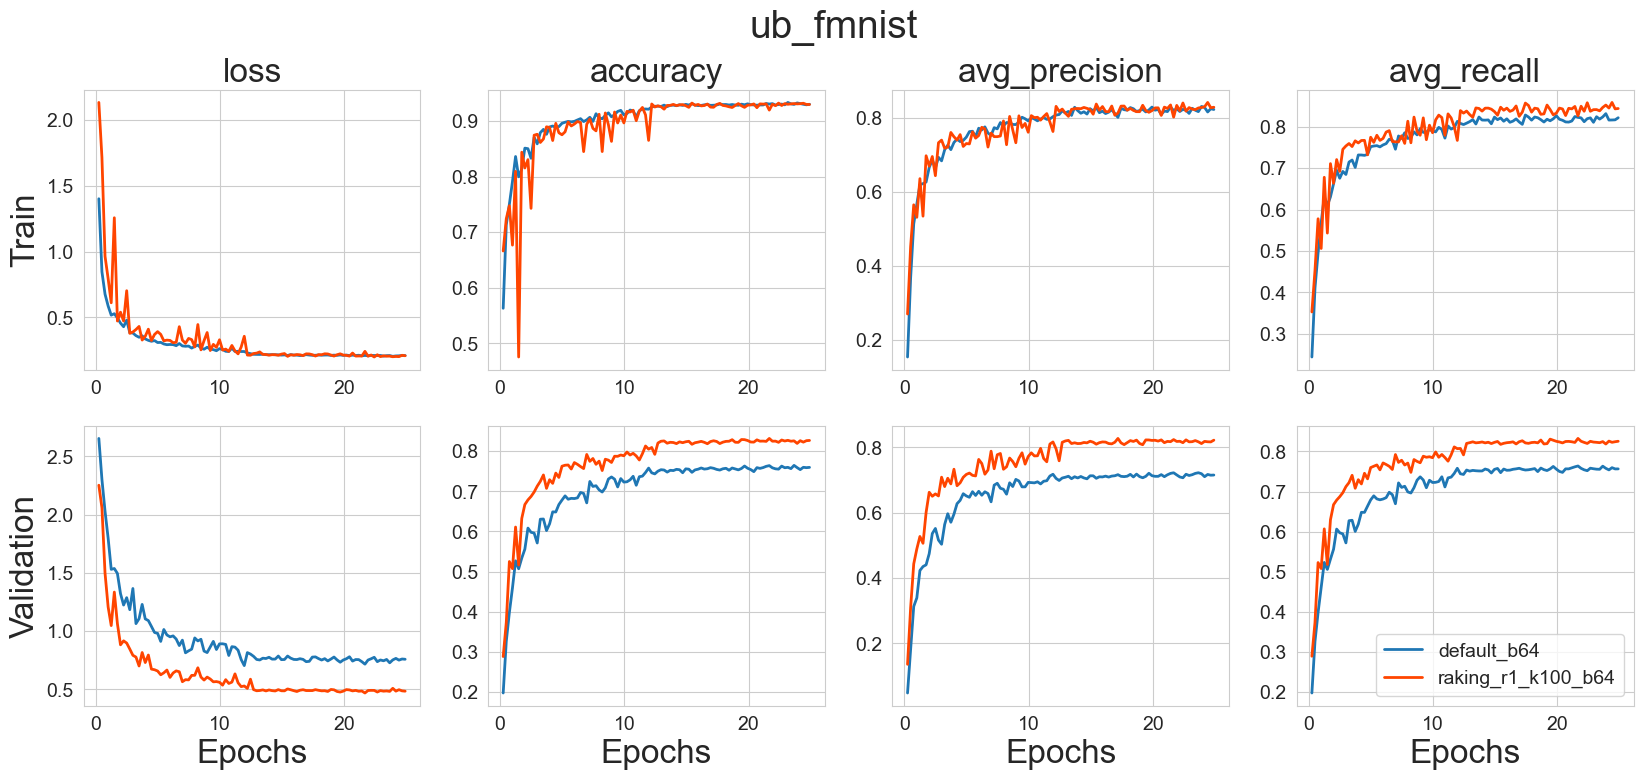

In [14]:
dataset = "ub_fmnist"
exp_names = [
    "default_b64",
    "raking_r1_k100_b64",
]

create_fig(dataset, exp_names, seeds=[0], batches=14400 / 64, metrics=["loss", "accuracy", "avg_precision", "avg_recall"])